In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

import pickle

In [39]:
## Load the dataset
data = pd.read_csv(r'C:\Users\Admin\Desktop\HCL Challenge\HCL-Challenge-Team-Kult\Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
## Preprocess the dataset
## by drop the irrelevant features/columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)  ## column wise drop
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [41]:
## Encode categorical variables
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


here if we apply labelencoder for 'Geography' then it will be problem bcz it has more than 2 unique categories so it may compare like 2>1>0 so it will a problem. Instead will use OHE with some modification.

In [42]:
## OHE 'Geography' column
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo = OneHotEncoder(sparse_output = False)
geo_encoder = onehot_encoder_geo.fit_transform(data[['Geography']])
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [43]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [44]:
geo_encoded_df = pd.DataFrame(geo_encoder, columns = onehot_encoder_geo.get_feature_names_out(['Geography']))

In [45]:
## combine one hot encoder columns with the original data
data = pd.concat([data.drop('Geography', axis=1), geo_encoded_df], axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


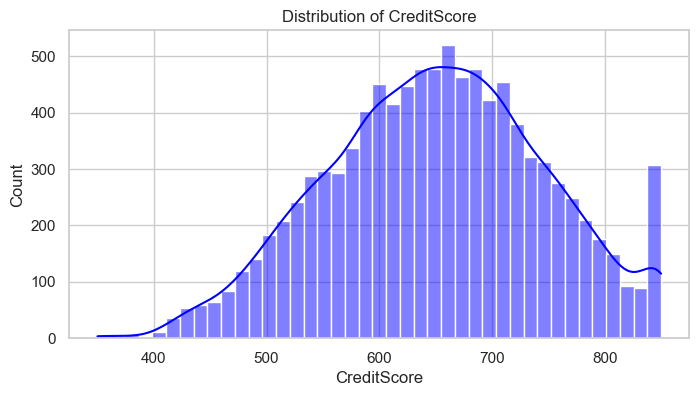

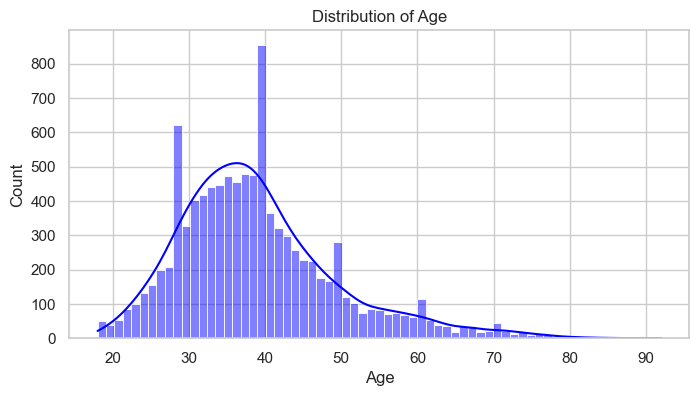

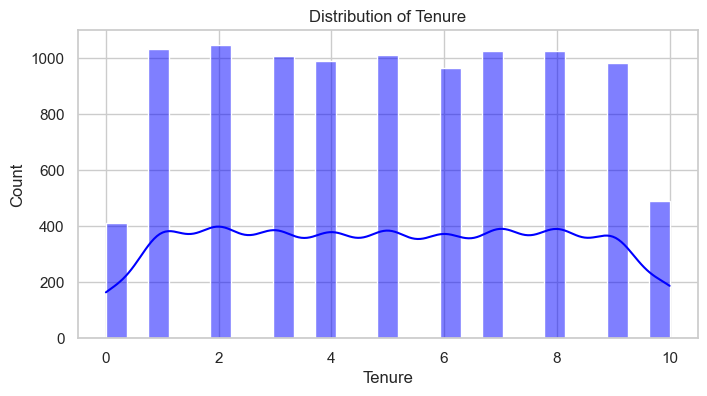

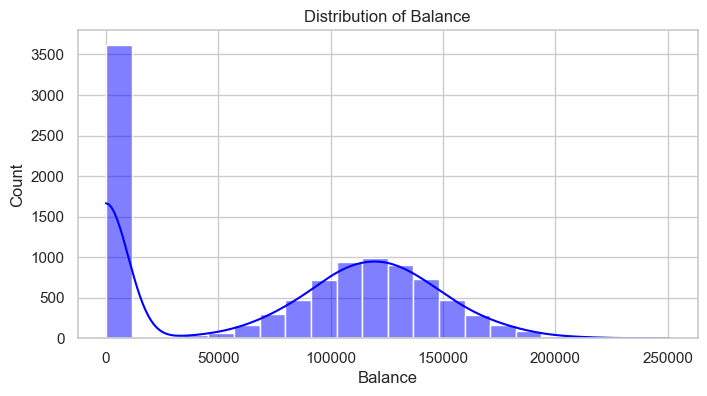

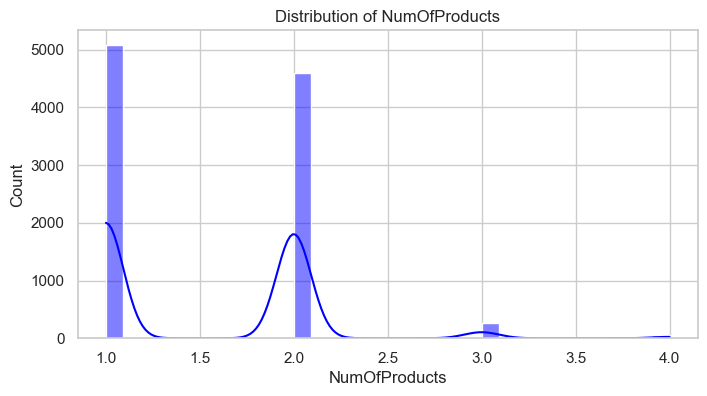

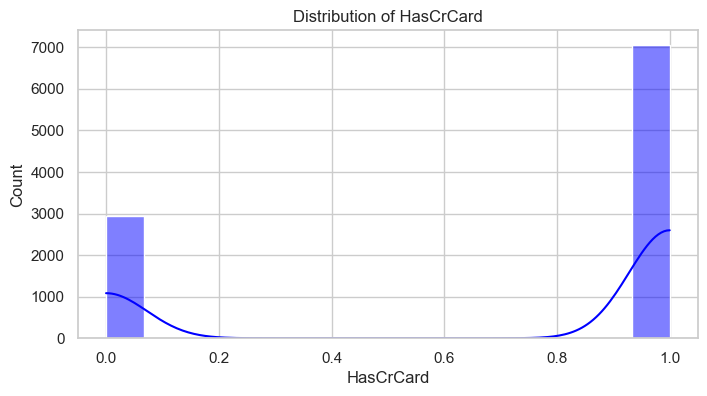

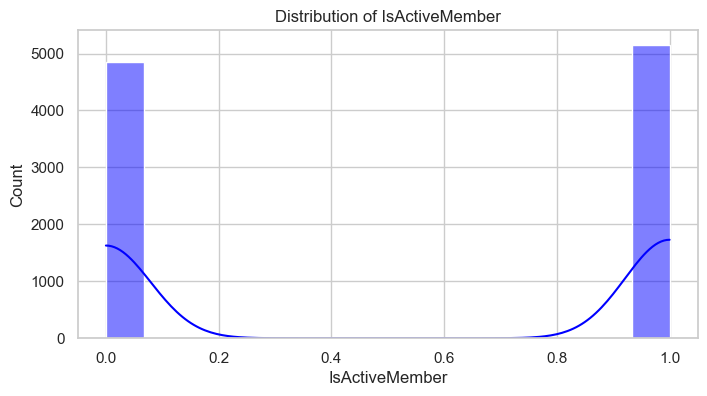

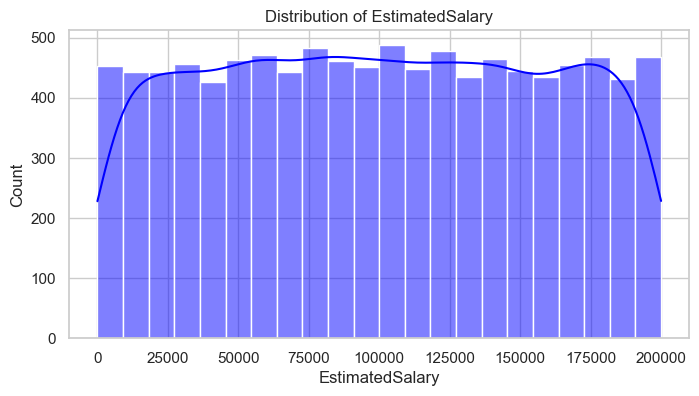

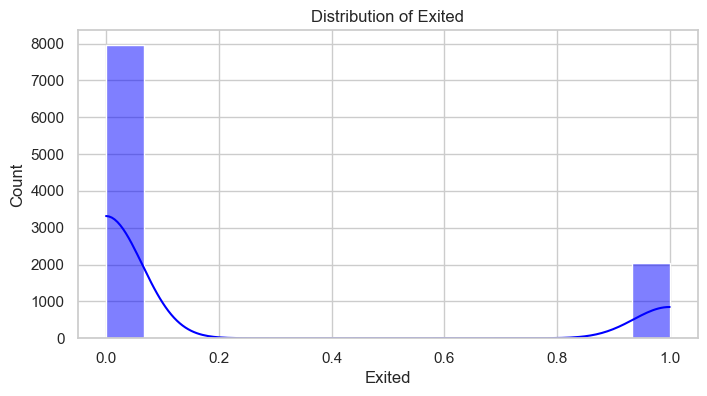

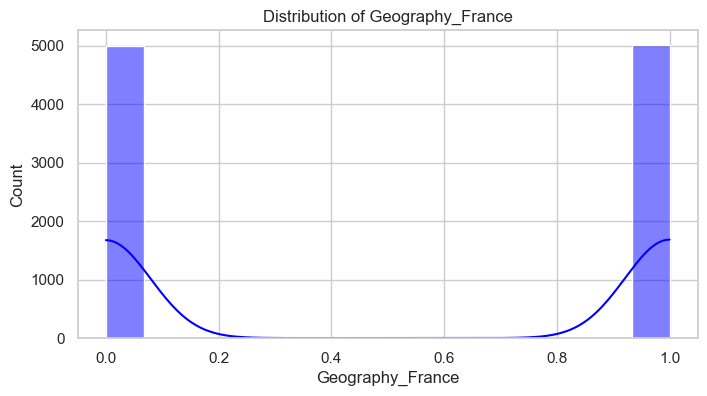

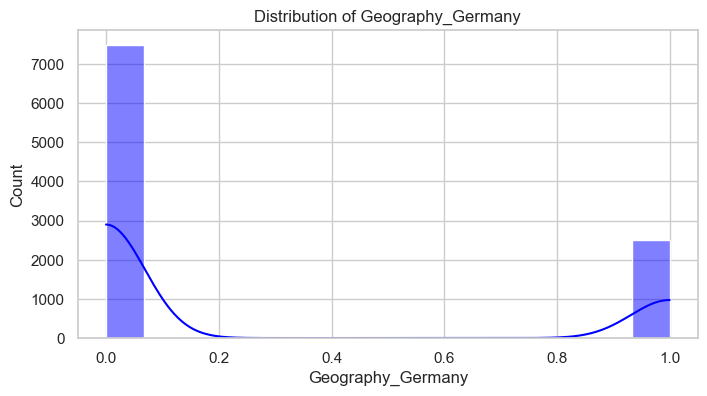

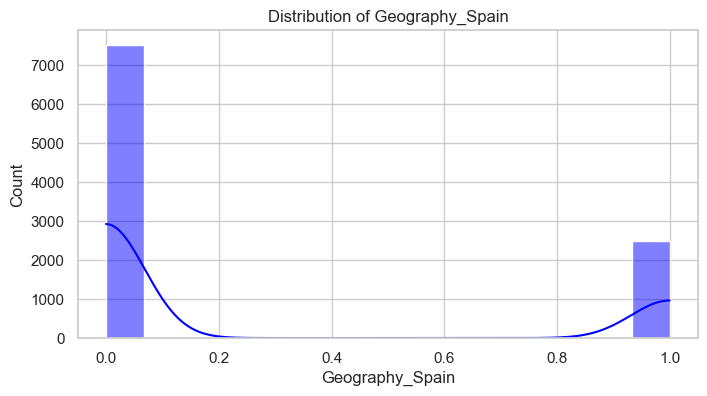

In [46]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [47]:
## Saving the encoders and scaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender, file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo, file)

In [48]:
## Divide the dataset into independent and dependent features
X = data.drop('Exited', axis=1)
y = data['Exited']

## Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale these features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [50]:
X_test

array([[-0.57749609,  0.91324755, -0.6557859 , ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.29729735,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.52560743, -1.09499335,  0.48508334, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.81311987, -1.09499335,  0.77030065, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.41876609,  0.91324755, -0.94100321, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.24540869,  0.91324755,  0.00972116, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [51]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## ANN Implementation

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [53]:
X_train.shape[1]

12

In [54]:
## Build our ANN 
model = Sequential([
    Dense(64, activation='relu', input_shape = (X_train.shape[1],)),   ## HL1 connected with input layer
    Dense(32, activation='relu'),  ## HL2 connected with HL1
    Dense(1, activation = 'sigmoid') ## Output layer connected with HL2
])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy()
loss

In [57]:
## Compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
## Set up the tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [59]:
## Set up early 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  ## can test on basis of 'patience' level

In [60]:
## Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), 
                    epochs=100, 
                    # batch_size=32, 
                    # validation_split=0.2, 
                    callbacks=[tensorflow_callback, early_stopping_callback])

Epoch 1/100
250/250 [==============================] - 4s 8ms/step - loss: 0.3961 - accuracy: 0.8346 - val_loss: 0.3607 - val_accuracy: 0.8555
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3538 - accuracy: 0.8547 - val_loss: 0.3410 - val_accuracy: 0.8605
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3469 - accuracy: 0.8556 - val_loss: 0.3443 - val_accuracy: 0.8595
Epoch 4/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3427 - accuracy: 0.8586 - val_loss: 0.3378 - val_accuracy: 0.8575
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3428 - accuracy: 0.8601 - val_loss: 0.3484 - val_accuracy: 0.8580
Epoch 6/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3392 - accuracy: 0.8610 - val_loss: 0.3405 - val_accuracy: 0.8610
Epoch 7/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3339 - accuracy: 0.8649 - val_loss: 0.3386 - val_accuracy: 0.8620

In [61]:
## Saving the model using .h5 file format
model.save('model.h5')

c:\Users\Admin\Desktop\HCL Challenge\myvenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Prediction time

In [44]:
## Load the pickle file
## Lets do this all in 'prediction.ipynb' file

In [ ]:
## part end.